# 4.10 TASK PART 2

In [29]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [30]:
# establishing a path
path = r'C:\Users\harkn\OneDrive\Desktop\Tasks\Data Immersion\Instacart Basket Analysis'

In [31]:
# importing dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10 filtered_profiled_data_avg.pkl'))

In [32]:
# column names, for reference
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'department', 'order_id', 'user_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'spending_flag', 'order_frequency_flag', 'first_name',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependents',
       'family_status', 'income', 'region', 'age_group', 'income_group',
       'family_size'],
      dtype='object')

### Ordering habits and loyalty status

In [74]:
#create a variable for order frequency
order_frequency = df['department'].value_counts().sort_index()

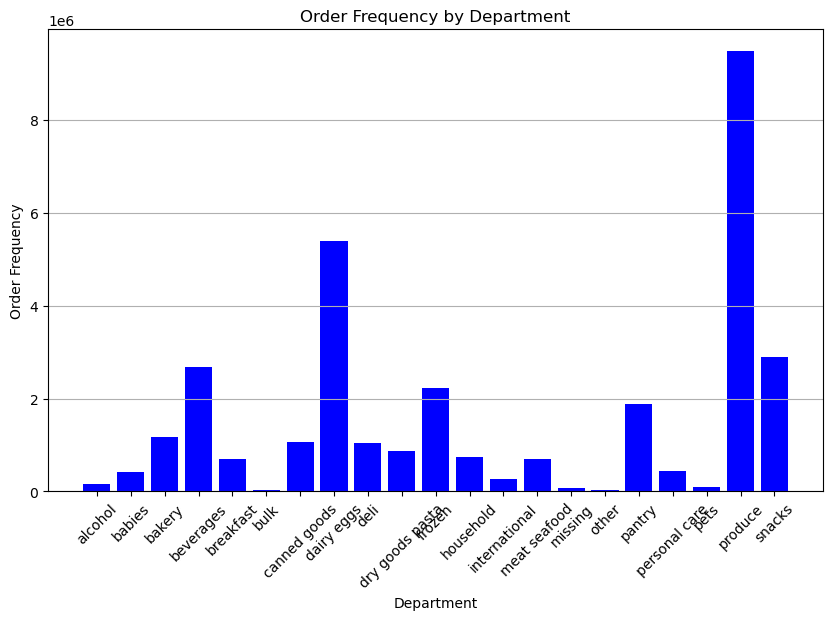

In [80]:
# Create a bar chart
department_frequency_bar = plt.figure(figsize=(10, 6))
plt.bar(order_frequency.index, order_frequency, color='blue')
plt.xlabel('Department')
plt.ylabel('Order Frequency')
plt.title('Order Frequency by Department')
plt.xticks(rotation=45)
plt.grid(axis='y')
#saving image
department_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_frequency_bar.png'))

In [36]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,department,order_id,user_id,order_number,orders_day_of_week,...,state,age,date_joined,number_of_dependents,family_status,income,region,age_group,income_group,family_size
0,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,3139998,138,28,6,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,65+,"A. Less than $50,000",Small Family
1,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,1977647,138,30,6,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,65+,"A. Less than $50,000",Small Family
2,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,389851,709,2,0,...,Vermont,66,6/16/2018,2,married,158302,Northeast,65+,"C. $100,000-250,000",Small Family
3,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,652770,764,1,3,...,Wisconsin,40,2/9/2020,3,married,31308,Midwest,35-65,"A. Less than $50,000",Large Family
4,1,Chocolate Sandwich Cookies,61,19,5.8,snacks,1813452,764,3,4,...,Wisconsin,40,2/9/2020,3,married,31308,Midwest,35-65,"A. Less than $50,000",Large Family


### Order counts by Loyalty Status

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

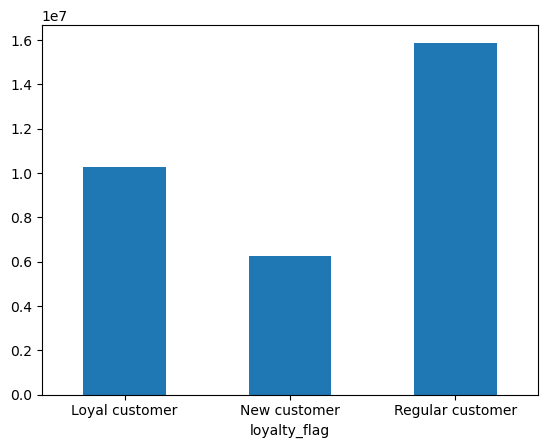

In [84]:
#count the number of orders per loyalty status
order_counts_by_loyalty = df['loyalty_flag'].value_counts().sort_index().plot.bar()
plt.xticks(rotation = 0)

In [86]:
#saving image
order_counts_by_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_counts_by_loyalty.png'))

### Ordering Habits by Region

In [41]:
# grouping by 'region' and calculating various statistics
region_grouped = df.groupby('region').agg({
    'order_id': 'count',  # Number of orders
    'order_number': 'mean',  # Average order number per customer
    'prices': ['mean', 'sum'],  # Average and total spending
    'days_since_prior_order': 'mean',  # Average days since prior order
    'reordered': 'mean'  # Percentage of reordered items
}).reset_index()

In [42]:
region_grouped

region  order_id order_number    prices              \
                 count         mean      mean         sum   
0    Midwest   7596753    16.926250  7.792615  59188760.0   
1  Northeast   5722264    17.216976  7.782445  44526636.0   
2      South  10790797    17.152485  7.794976  84100056.0   
3       West   8292161    17.280695  7.790405  64589680.0   

  days_since_prior_order reordered  
                    mean      mean  
0              11.181258  0.587005  
1              11.075239  0.590997  
2              11.107427  0.589766  
3              11.046479  0.590829

### Connection between age and family status

In [44]:
# Grouping by Age Group and Family Status and calculating statistics
age_family_grouped = df.groupby(['age_group', 'family_status']).agg({
    'order_id': 'count',  # Number of orders
    'order_number': 'mean',  # Average order number per customer
    'prices': ['mean', 'sum'],  # Average and total spending
    'days_since_prior_order': 'mean',  # Average days since prior order
    'reordered': 'mean'  # Percentage of reordered items
}).reset_index()

In [45]:
age_family_grouped

age_group                     family_status  order_id order_number  \
                                                  count         mean   
0     18-35  living with parents and siblings   1550473    17.297643   
1     18-35                           married   5319131    17.070752   
2     18-35                            single   2276002    17.066134   
3     35-65                  divorced/widowed    773828    17.715182   
4     35-65                           married  11345972    17.089601   
5     35-65                            single   3049185    17.405060   
6       65+                  divorced/widowed   1997734    17.107609   
7       65+                           married   6089650    17.106060   

     prices             days_since_prior_order reordered  
       mean         sum                   mean      mean  
0  7.800799  12093360.0              11.047623  0.590973  
1  7.782372  41388136.0              11.123866  0.589185  
2  7.780904  17706746.0              11.177319  0.589697  
3  7.797566   6033063.0              10.958009  0.595108  
4  7.794149  88417920.0              11.130833  0.589281  
5  7.786788  23739972.0              11.037679  0.591323  
6  7.802355  15584377.0              11.081598  0.588303  
7  7.791706  47441556.0              11.079784  0.589075

In [46]:
# Renaming columns for clarity
age_family_grouped.columns = ['Age Group', 'Family Status', 'Total Orders', 'Avg Order Number', 'Avg Price', 'Total Spend', 'Avg Days Since Prior Order', 'Reorder Ratio']

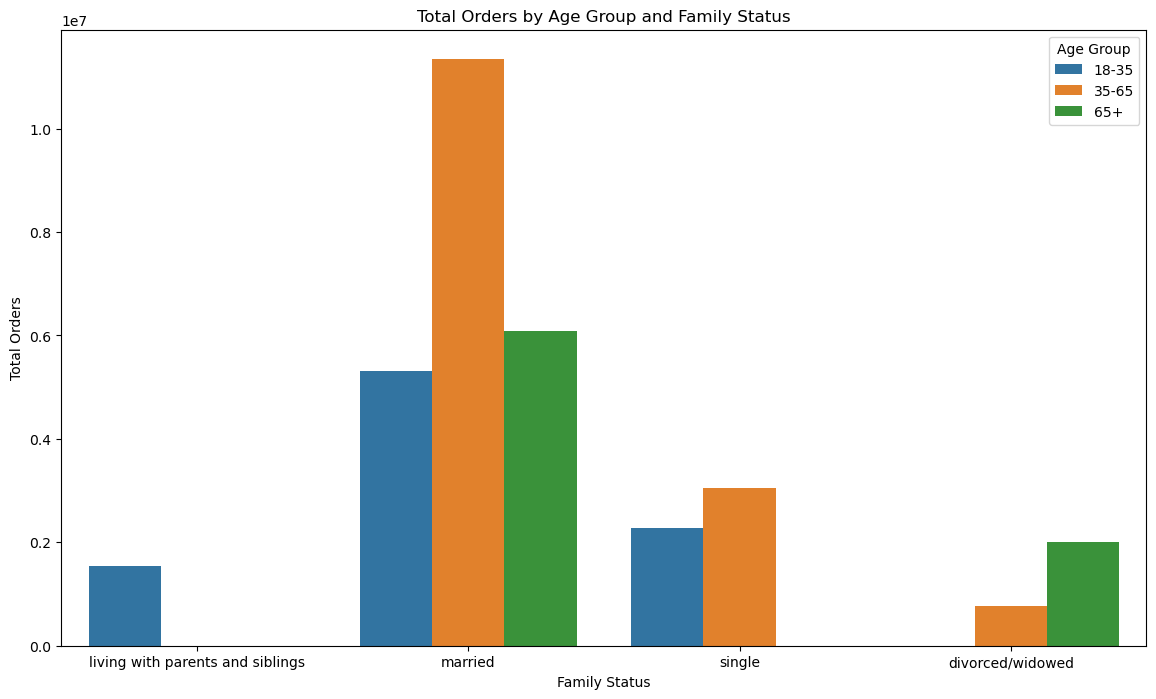

In [47]:
# Bar plot for total orders by Age Group and Family Status
total_orders_age_family_status = plt.figure(figsize=(14, 8))
sns.barplot(x='Family Status', y='Total Orders', hue='Age Group', data=age_family_grouped)
plt.title('Total Orders by Age Group and Family Status')
plt.ylabel('Total Orders')
plt.xlabel('Family Status')
plt.legend(title='Age Group')
#saving image
total_orders_age_family_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'total_orders_age_family_status.png'))

### OTHER INSIGHTS

In [49]:
df['income'].value_counts()

income
72344     4395
112610    4282
57501     4136
115620    3891
36163     3657
          ... 
55348        5
41293        5
42608        5
128443       5
32043        5
Name: count, Length: 107835, dtype: int64

In [50]:
df['income'].describe()

count    3.240198e+07
mean     9.943983e+04
std      4.305693e+04
min      2.590300e+04
25%      6.700600e+04
50%      9.662000e+04
75%      1.279140e+05
max      5.939010e+05
Name: income, dtype: float64

In [51]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'department', 'order_id', 'user_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'spending_flag', 'order_frequency_flag', 'first_name',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependents',
       'family_status', 'income', 'region', 'age_group', 'income_group',
       'family_size'],
      dtype='object')

In [52]:
# view the distribution of each income group
income_group_distribution = df['income_group'].value_counts().sort_index()
print(income_group_distribution)

income_group
A. Less than $50,000     3592990
B. $50,000-100,000      13995009
C. $100,000-250,000     14631396
D. $250,000+              182580
Name: count, dtype: int64


In [53]:
df[['income', 'income_group']].head(10)

,income,income_group
0,49620,"A. Less than $50,000"
1,49620,"A. Less than $50,000"
2,158302,"C. $100,000-250,000"
3,31308,"A. Less than $50,000"
4,31308,"A. Less than $50,000"
5,57797,"B. $50,000-100,000"
6,34171,"A. Less than $50,000"
7,44856,"A. Less than $50,000"
8,153843,"C. $100,000-250,000"
9,153843,"C. $100,000-250,000"


In [54]:
# Calculate the average order price by income group
price_by_income = df.groupby('income_group')['prices'].mean().sort_values()
plt.show()

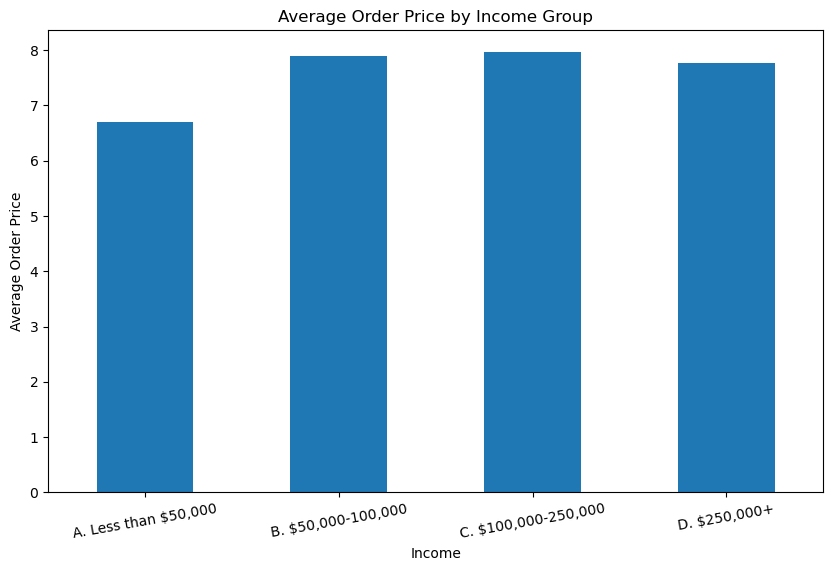

In [120]:
# creating chart for price by income group
# 1. Price of Orders by Income Group
price_by_income = df.groupby('income_group')['prices'].mean().sort_values().sort_index()
plt.figure(figsize=(10, 6))
price_by_income.plot(kind='bar')
plt.title('Average Order Price by Income Group')
plt.xlabel('Income')
plt.ylabel('Average Order Price')
plt.xticks(rotation=10)
plt.savefig('average_order_price_by_income.png', dpi=300, bbox_inches='tight')
#saving image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_by_income.png'))

<Figure size 1400x800 with 0 Axes>

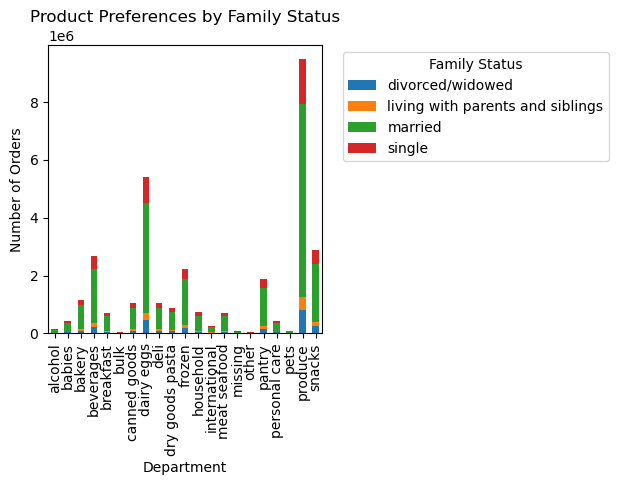

In [118]:
# 3. Product Preferences by Family Status
product_preferences = df.groupby(['department', 'family_status'])['order_id'].count().unstack().fillna(0)
plt.figure(figsize=(14, 8))
product_preferences.plot(kind='bar', stacked=True)
plt.title('Product Preferences by Family Status')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#saving image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'product_preferences.png'))

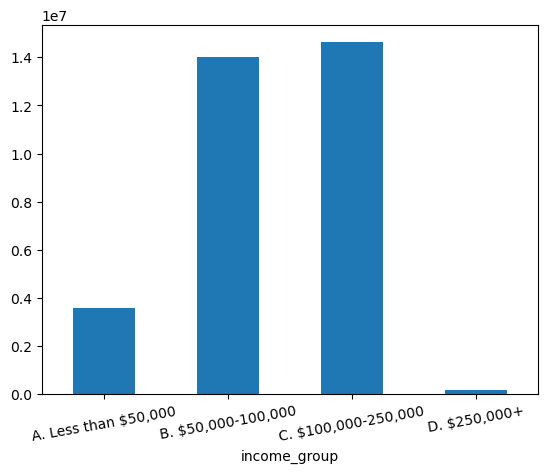

In [94]:
#count the number of orders per income group
order_counts_by_income = df['income_group'].value_counts().sort_index().plot.bar()
plt.xticks(rotation = 10)
#saving image
order_counts_by_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_counts_by_income.png'))

In [122]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'department', 'order_id', 'user_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'spending_flag', 'order_frequency_flag', 'first_name',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependents',
       'family_status', 'income', 'region', 'age_group', 'income_group',
       'family_size'],
      dtype='object')

In [124]:
df.shape

(32401975, 35)